### <center>**Decisiones Bajo Incertidumbre en las Organizaciones**</center><center>**Semestre 2016-01**</center> 

### Módulo 2. Análisis de datos para la toma de una decisión

**Paso 1. Importar los paquetes requeridos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#La última línea permitirá que las gráficas se "incrusten" en el notebook.

**Paso 2. Lectura de datos**

In [4]:
df=pd.read_excel("Supermarket Transactions.xlsx")
df

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Distance,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,S,Y,9840,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2011-12-20,7841,M,M,Y,9475,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2011-12-21,8374,F,M,N,673,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2011-12-21,9619,M,M,Y,8468,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2011-12-22,1900,F,S,Y,8505,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00
5,6,2011-12-22,6696,F,M,Y,6829,$10K - $30K,Beverly Hills,CA,USA,Food,Deli,Side Dishes,3,4.37
6,7,2011-12-23,9673,M,S,Y,6925,$30K - $50K,Salem,OR,USA,Food,Frozen Foods,Breakfast Foods,4,13.78
7,8,2011-12-25,354,F,M,Y,1009,$150K +,Yakima,WA,USA,Food,Canned Foods,Canned Soup,6,7.34
8,9,2011-12-25,1293,M,M,Y,619,$10K - $30K,Bellingham,WA,USA,Non-Consumable,Household,Cleaning Supplies,1,2.41
9,10,2011-12-25,7938,M,S,N,9323,$50K - $70K,San Diego,CA,USA,Non-Consumable,Health and Hygiene,Pain Relievers,2,8.96


In [22]:
#¿Y qué es la tabla anterior?... ¡Un DataFrame de Pandas!
print(type(df_datos))

<class 'pandas.core.frame.DataFrame'>


Note que la primera columna no estaba en el archivo de excel. Esto es una indexación automática que hace Pandas.
Para quitarla:

In [5]:
df_datos=df.set_index("Transaction")
df_datos

,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Distance,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
Transaction,,,,,,,,,,,,,,,
1,2011-12-18,7223,F,S,Y,9840,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
2,2011-12-20,7841,M,M,Y,9475,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
3,2011-12-21,8374,F,M,N,673,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
4,2011-12-21,9619,M,M,Y,8468,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
5,2011-12-22,1900,F,S,Y,8505,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00
6,2011-12-22,6696,F,M,Y,6829,$10K - $30K,Beverly Hills,CA,USA,Food,Deli,Side Dishes,3,4.37
7,2011-12-23,9673,M,S,Y,6925,$30K - $50K,Salem,OR,USA,Food,Frozen Foods,Breakfast Foods,4,13.78
8,2011-12-25,354,F,M,Y,1009,$150K +,Yakima,WA,USA,Food,Canned Foods,Canned Soup,6,7.34
9,2011-12-25,1293,M,M,Y,619,$10K - $30K,Bellingham,WA,USA,Non-Consumable,Household,Cleaning Supplies,1,2.41



**Paso 3. Algunas operaciones básicas con Dataframe**

In [7]:
#Resumen estadístico... ¿De las variables cuantitativas? ¡ojo!
df_datos.describe()

,Customer ID,Distance,Units Sold,Revenue
count,14059.000000,14059.000000,14059.000000,14059.000000
mean,5116.902127,5287.631197,4.080589,13.004512
std,2920.755202,3014.602173,1.174421,8.215543
min,3.000000,1.000000,1.000000,0.530000
25%,2549.000000,2692.000000,3.000000,6.840000
50%,5060.000000,5307.000000,4.000000,11.250000
75%,7633.000000,7902.500000,5.000000,17.370000
max,10280.000000,10500.000000,8.000000,56.700000


Y estas son algunas operaciones que podemos hacer con los DataFrame

In [9]:
#Mostrar solo una columna
print(df_datos["Purchase Date"])

Transaction
1       2011-12-18
2       2011-12-20
3       2011-12-21
4       2011-12-21
5       2011-12-22
6       2011-12-22
7       2011-12-23
8       2011-12-25
9       2011-12-25
10      2011-12-25
11      2011-12-26
12      2011-12-26
13      2011-12-26
14      2011-12-26
15      2011-12-27
16      2011-12-27
17      2011-12-27
18      2011-12-28
19      2011-12-28
20      2011-12-28
21      2011-12-29
22      2011-12-29
23      2011-12-29
24      2011-12-29
25      2011-12-29
26      2011-12-30
27      2011-12-30
28      2011-12-30
29      2011-12-30
30      2011-12-31
           ...    
14030   2013-12-25
14031   2013-12-25
14032   2013-12-25
14033   2013-12-25
14034   2013-12-25
14035   2013-12-25
14036   2013-12-25
14037   2013-12-25
14038   2013-12-25
14039   2013-12-25
14040   2013-12-26
14041   2013-12-26
14042   2013-12-26
14043   2013-12-26
14044   2013-12-26
14045   2013-12-26
14046   2013-12-27
14047   2013-12-27
14048   2013-12-27
14049   2013-12-27
14050   2013-12-28


In [11]:
#Mostrar las primeras cuatro filas
print(df_datos.head(4))


            Purchase Date  Customer ID Gender Marital Status Homeowner  \
Transaction                                                              
1              2011-12-18         7223      F              S         Y   
2              2011-12-20         7841      M              M         Y   
3              2011-12-21         8374      F              M         N   
4              2011-12-21         9619      M              M         Y   

             Distance Annual Income         City State or Province Country  \
Transaction                                                                  
1                9840   $30K - $50K  Los Angeles                CA     USA   
2                9475   $70K - $90K  Los Angeles                CA     USA   
3                 673   $50K - $70K    Bremerton                WA     USA   
4                8468   $30K - $50K     Portland                OR     USA   

            Product Family Product Department Product Category  Units Sold  \
Transact

In [12]:
#Mostrar las últimas dos filas
print(df_datos.tail(2))

            Purchase Date  Customer ID Gender Marital Status Homeowner  \
Transaction                                                              
14058          2013-12-31         6153      F              S         N   
14059          2013-12-31         3656      M              S         N   

             Distance Annual Income      City State or Province Country  \
Transaction                                                               
14058            5754   $50K - $70K   Spokane                WA     USA   
14059            6026   $50K - $70K  Portland                OR     USA   

             Product Family Product Department Product Category  Units Sold  \
Transaction                                                                   
14058                 Drink              Dairy            Dairy           2   
14059        Non-Consumable          Household       Electrical           5   

             Revenue  
Transaction           
14058           4.00  
14059          2

In [13]:
#Mostrar los índices
print(df_datos.index)

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            14050, 14051, 14052, 14053, 14054, 14055, 14056, 14057, 14058,
            14059],
           dtype='int64', name='Transaction', length=14059)


In [15]:
#Mostrar los nombres de las columnas
print(df_datos.columns)

Index(['Purchase Date', 'Customer ID', 'Gender', 'Marital Status', 'Homeowner',
       'Distance', 'Annual Income', 'City', 'State or Province', 'Country',
       'Product Family', 'Product Department', 'Product Category',
       'Units Sold', 'Revenue'],
      dtype='object')


In [16]:
#Organizar el DataFrame por una columna en particular
print(df_datos.sort_values(by='Gender',ascending=True))

            Purchase Date  Customer ID Gender Marital Status Homeowner  \
Transaction                                                              
1              2011-12-18         7223      F              S         Y   
5879           2013-02-14         6433      F              S         Y   
5878           2013-02-14         8697      F              S         Y   
5877           2013-02-14         7720      F              M         Y   
11115          2013-08-26         6603      F              M         N   
5872           2013-02-14         8363      F              M         Y   
11119          2013-08-26         5313      F              M         Y   
5869           2013-02-14          286      F              S         N   
5868           2013-02-13         2224      F              M         N   
5867           2013-02-13         8105      F              M         Y   
5866           2013-02-13         7782      F              S         N   
11120          2013-08-26         2448

In [17]:
#Mostrar solo los registros que cumplan con una condición
print(df_datos[df_datos.Revenue > 35])

            Purchase Date  Customer ID Gender Marital Status Homeowner  \
Transaction                                                              
56             2012-01-05         7733      M              S         Y   
77             2012-01-09         4925      F              S         Y   
84             2012-01-10         7823      F              M         Y   
87             2012-01-11         7493      F              M         Y   
187            2012-01-22         3001      F              M         N   
254            2012-01-28         3092      M              S         N   
289            2012-01-31         6843      M              M         Y   
358            2012-02-05         7556      F              S         N   
464            2012-02-14         4351      M              S         N   
512            2012-02-18         5405      F              M         Y   
563            2012-02-23         7234      F              M         Y   
620            2012-02-28         2818

In [18]:
#Remplazar un valor (primer Customer ID, por ejemplo )
df_remplazo=df_datos.replace("7223","remplazo")
df_remplazo

,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Distance,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
Transaction,,,,,,,,,,,,,,,
1,2011-12-18,remplazo,F,S,Y,9840,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
2,2011-12-20,7841,M,M,Y,9475,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
3,2011-12-21,8374,F,M,N,673,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
4,2011-12-21,9619,M,M,Y,8468,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
5,2011-12-22,1900,F,S,Y,8505,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00
6,2011-12-22,6696,F,M,Y,6829,$10K - $30K,Beverly Hills,CA,USA,Food,Deli,Side Dishes,3,4.37
7,2011-12-23,9673,M,S,Y,6925,$30K - $50K,Salem,OR,USA,Food,Frozen Foods,Breakfast Foods,4,13.78
8,2011-12-25,354,F,M,Y,1009,$150K +,Yakima,WA,USA,Food,Canned Foods,Canned Soup,6,7.34
9,2011-12-25,1293,M,M,Y,619,$10K - $30K,Bellingham,WA,USA,Non-Consumable,Household,Cleaning Supplies,1,2.41


In [23]:
#Presentar un solo registro
df_remplazo.ix[1]


Purchase Date         2011-12-18 00:00:00
Customer ID                      remplazo
Gender                                  F
Marital Status                          S
Homeowner                               Y
Distance                             9840
Annual Income                 $30K - $50K
City                          Los Angeles
State or Province                      CA
Country                               USA
Product Family                       Food
Product Department            Snack Foods
Product Category              Snack Foods
Units Sold                              5
Revenue                             27.38
Name: 1, dtype: object

**Paso 4. Visualización**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F099F79C88>]], dtype=object)

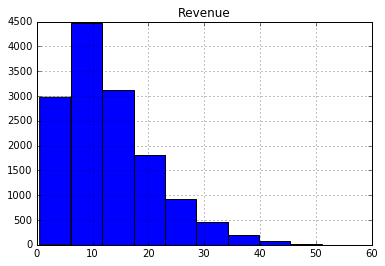

In [24]:
#Histogramas
pd.DataFrame.hist(df_datos,"Revenue")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F09B054518>]], dtype=object)

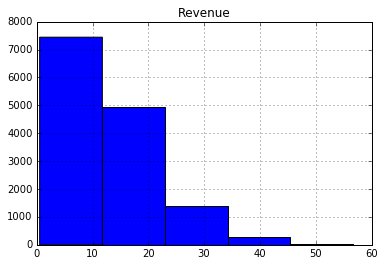

In [25]:
#Se puede cambiar el número de bins. ¿Cambia el análisis también?
pd.DataFrame.hist(df_datos,"Revenue",bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F099AB7208>]], dtype=object)

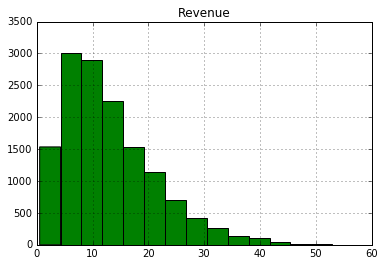

In [26]:
#De forma predeterminada los bins son 10...¿Qué pasará ahorá con 15?
pd.DataFrame.hist(df_datos,"Revenue",bins=15, color="green")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F099CA3940>]], dtype=object)

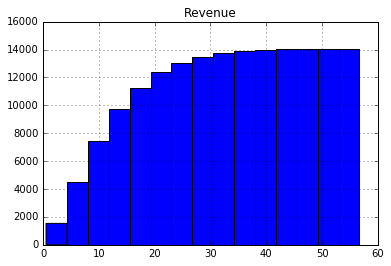

In [29]:
#¿Y si "ordenamos" el histograma anterior?
pd.DataFrame.hist(df_datos,"Revenue",bins=15,cumulative=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F099EA1EF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F099D1C080>], dtype=object)

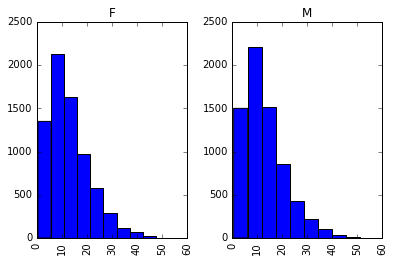

In [30]:
#¡Veamos los ingresos de los hombres y las mujeres!
pd.DataFrame.hist(df_datos,"Revenue",xlabelsize=10,ylabelsize=10,by="Gender")

Otros tipos de gráficos

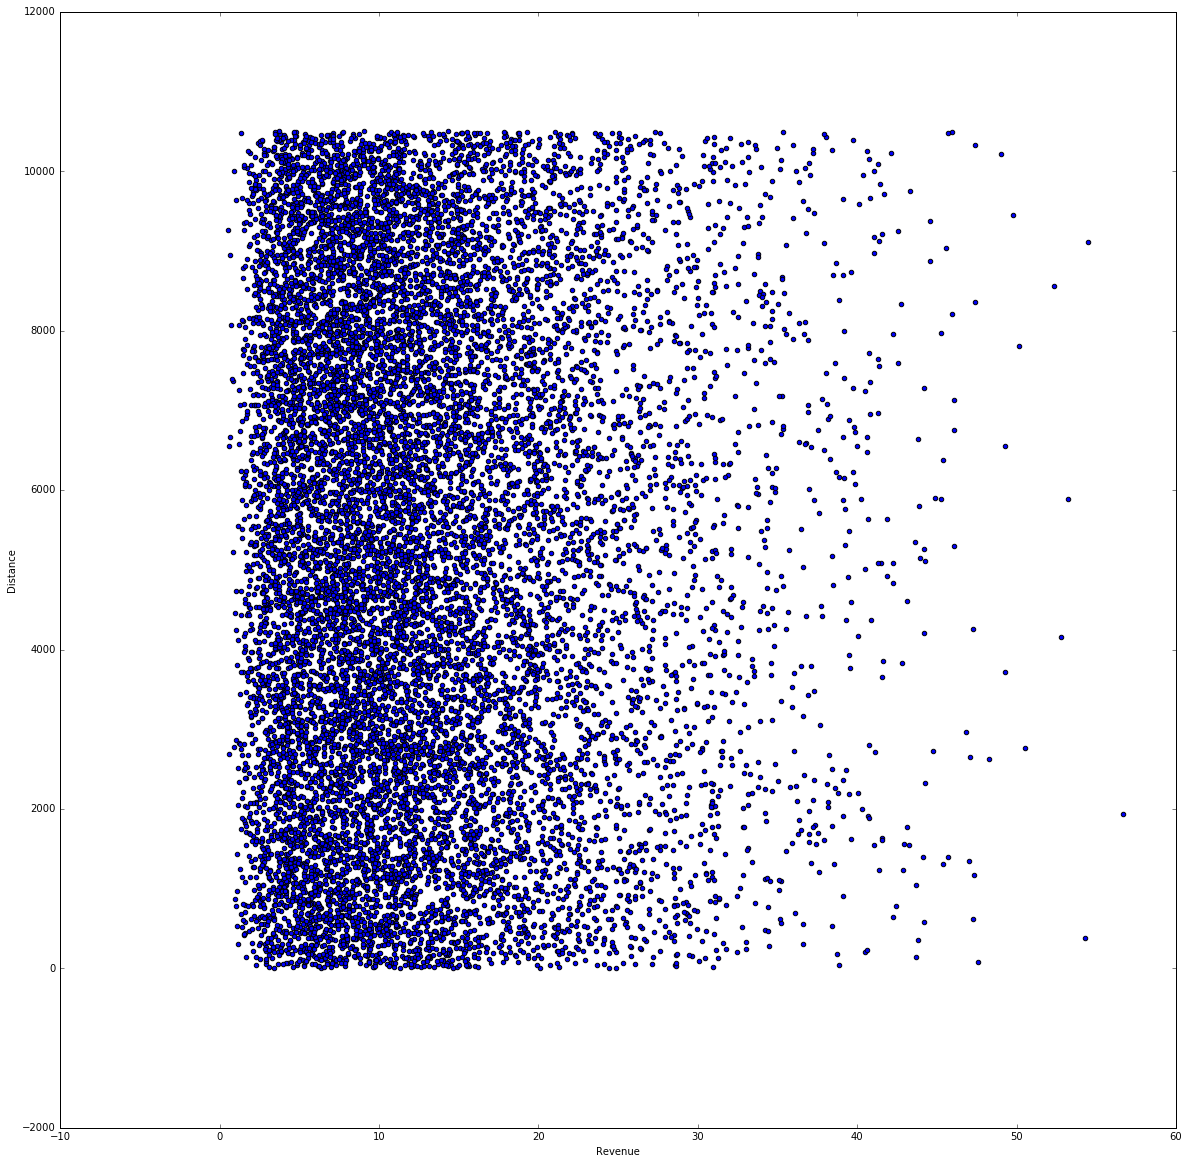

In [34]:
#Scatter plot:
df_datos.plot.scatter("Revenue","Distance",figsize=(20,20))

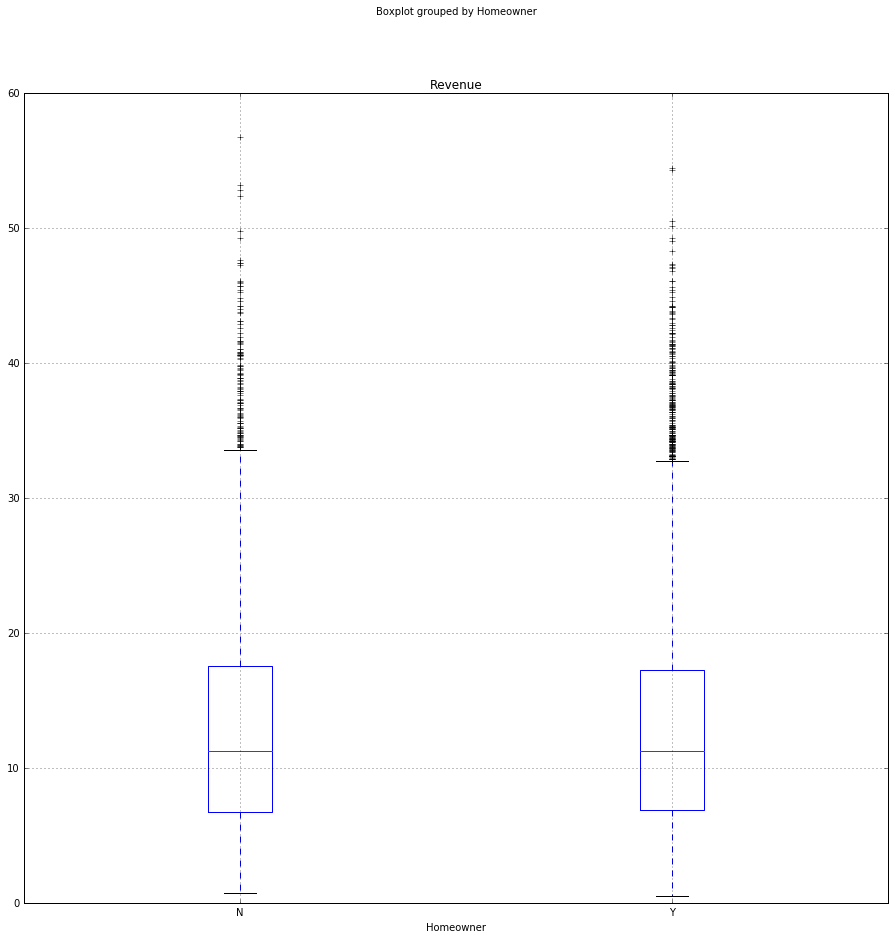

In [35]:
#boxplot
df_datos.boxplot("Revenue",figsize=(15,15),by="Homeowner")

¿Y qué podemos hacer con las variales categóricas?

In [31]:
#1. Contemos los valores de una columna
df_datos["Product Department"].value_counts()

Produce                1994
Snack Foods            1600
Household              1420
Frozen Foods           1382
Baking Goods           1072
Canned Foods            977
Dairy                   903
Health and Hygiene      893
Deli                    699
Beverages               680
Baked Goods             425
Alcoholic Beverages     356
Snacks                  352
Starchy Foods           277
Periodicals             202
Eggs                    198
Breakfast Foods         188
Canned Products         109
Seafood                 102
Meat                     89
Checkout                 82
Carousel                 59
Name: Product Department, dtype: int64

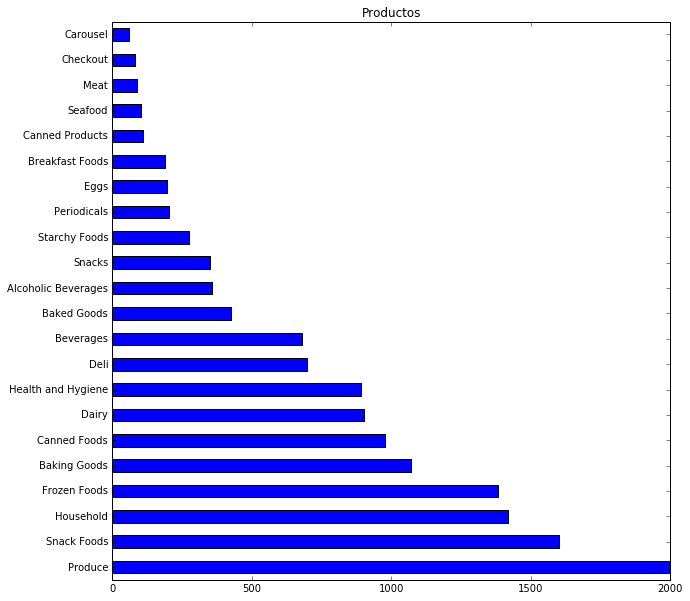

In [32]:
#Y ahora...¡Grafiquemos!
df_datos["Product Department"].value_counts().plot(kind="barh",figsize=(10,10))
plt.title("Productos")

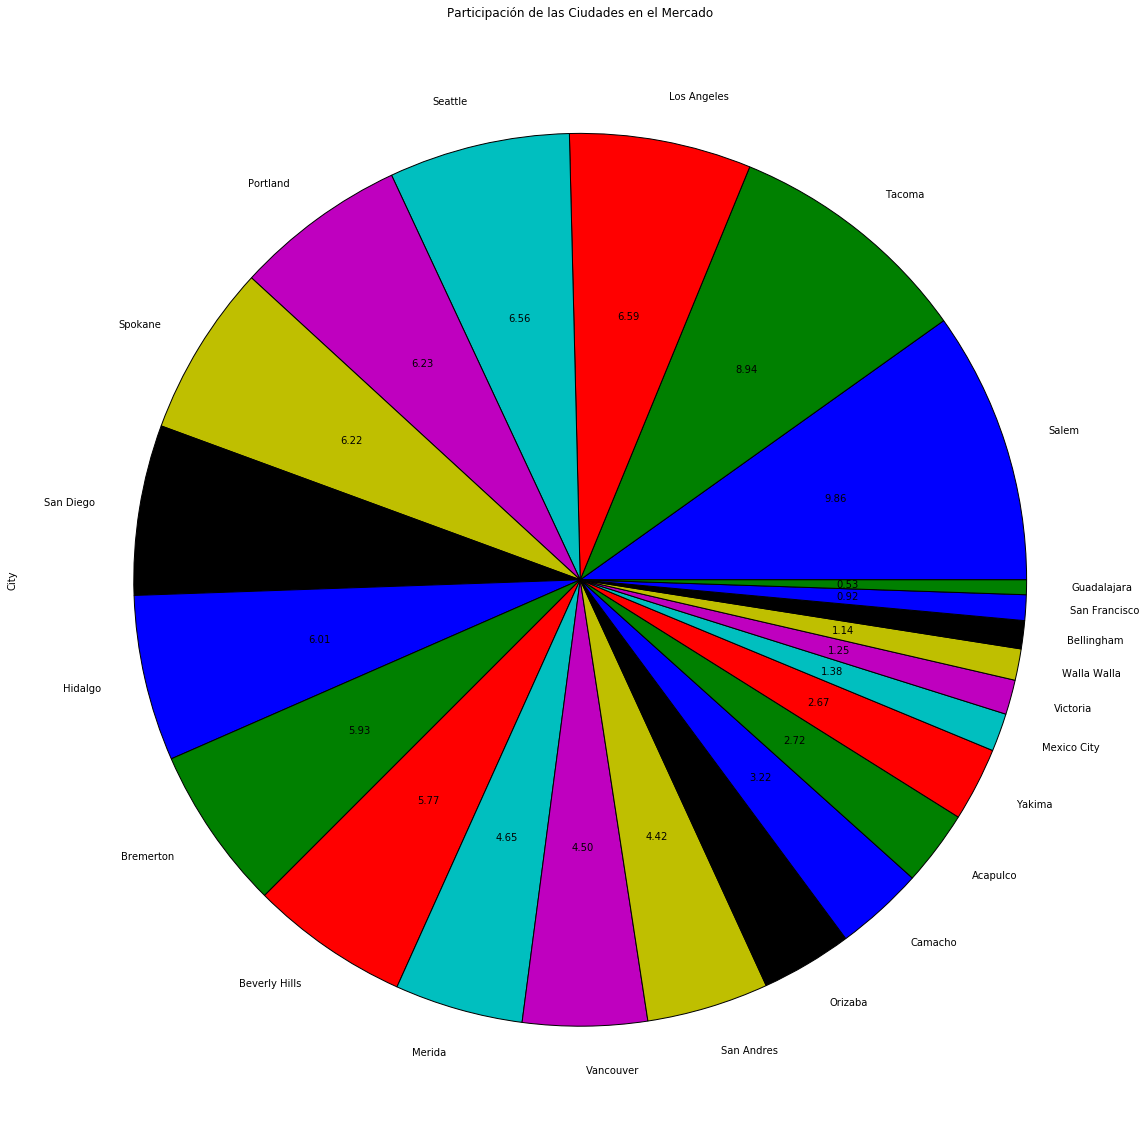

In [33]:
#¿Y con otra variable..?
df_datos["City"].value_counts().plot(kind="pie",figsize=(20,20),autopct="%.2f")
plt.title("Participación de las Ciudades en el Mercado")


Finalmente veamos un ejemplo Tablas Pivot en Pandas

In [38]:
#¿Qué pasa si queremos separar los ingresos de las personas casadas y solteras en los distintos estados o provincias?

df_piv2=df_datos.pivot_table(index=["State or Province"], values=["Revenue"],columns=["Marital Status"],\
                           aggfunc=[np.mean],margins=True)

#values: la variable que queremos separar
#columns: criterio de separación
#index: criterio de agrupamiento
#aggfunc: permite realizar calculos matem{aticos sobre las variables, en este caso la media}
#margins: crea una nueva columna("All") para presentar los cálculos de "aggfunc"

df_piv2

mean                      
                     Revenue                      
Marital Status             M          S        All
State or Province                                 
BC                 13.921085  13.458697  13.679889
CA                 12.785429  12.634205  12.707797
DF                 12.784347  13.444101  13.121914
Guerrero           14.278889  12.828396  13.476005
Jalisco             4.917000   7.726909   6.977600
OR                 13.270420  13.367956  13.323802
Veracruz           13.156840  13.813131  13.459526
WA                 12.731647  12.854021  12.791695
Yucatan            13.215471  13.515569  13.364602
Zacatecas          13.249223  13.138078  13.192151
All                12.994518  13.014051  13.004512

In [40]:
#¿Y si no queremos la media sino el máximo?
df_piv=df_datos.pivot_table(index=["State or Province"], values=["Revenue"],columns=["Marital Status"],\
                           aggfunc=[max],margins=True)
df_piv

max              
                  Revenue              
Marital Status          M      S    All
State or Province                      
BC                  54.46  54.30  54.46
CA                  48.25  46.08  48.25
DF                  40.60  45.37  45.37
Guerrero            47.04  47.58  47.58
Jalisco             19.40  23.81  23.81
OR                  46.08  53.19  53.19
Veracruz            43.68  52.80  52.80
WA                  50.17  52.35  52.35
Yucatan             46.08  41.88  46.08
Zacatecas           56.70  49.75  56.70
All                 56.70  54.30  56.70